In [2]:
import gym
from q_learning import TabularQAgent
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#automatic reloading
%load_ext autoreload
%autoreload 2

In [4]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def rolling_average(a, n=3):
    ret = []
    t = 0
    while t < len(a):
        ret.append(np.mean(a[t:t+n]))
        t += n
    return ret

# 4x4 Frozen Lake

In [5]:
from gym.envs.registration import register, spec

MY_ENV_NAME='FrozenLakeNonSlippery-v0'
try:
    spec(MY_ENV_NAME)
except:
    register(
        id=MY_ENV_NAME,
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name': '4x4', 'is_slippery': False},
    )
FLenv = gym.make(MY_ENV_NAME)

[2017-06-29 09:35:22,350] Making new env: FrozenLakeNonSlippery-v0


[2017-06-29 09:36:32,241] Making new env: FrozenLake-v0


The algorithm reached to goal 10.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 84.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 126.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 3451.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 5001.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 8003.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 23.0 times in 20000 number of episodes during learning phase.


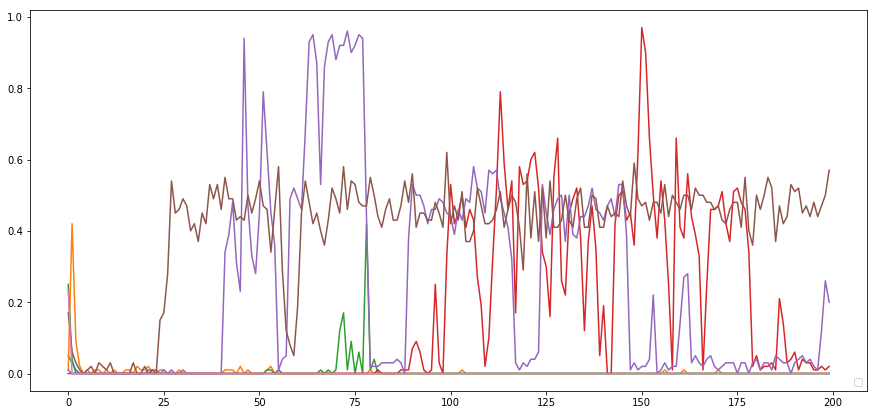

In [7]:
polynomial_learning_rates = [0.0, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9]
plt.figure(figsize=(15, 7))
env = gym.make('FrozenLake-v0') # creating a grid word environment
env = FLenv
for polynomial_learning_rate in polynomial_learning_rates:
    agent_q = TabularQAgent(env.observation_space, env.action_space, n_episodes=20000, 
                           init_std=1, discount=1, n_itr=1000)
    reached_goals = agent_q.learn(env, polynomial_learning_rate = polynomial_learning_rate)
    plt.plot(rolling_average(reached_goals, 100))
plt.legend(map(str, polynomial_learning_rates), loc = "lower right")

## Analyzing the behavior of eligibility traces with Frozen Lake Problem

1. The behavior of learning curve with eligibility traces ($\lambda$) is not consistent.

[2017-06-29 09:43:57,441] Making new env: FrozenLake-v0


The algorithm reached to goal 124.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 3896.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 1521.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 3334.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 10670.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 2080.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 6549.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 7955.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 109.0 times in 20000 number of episodes during learning phase.
The algorithm reached to goal 1697.0 times in 20000 number of episodes during learning phase.


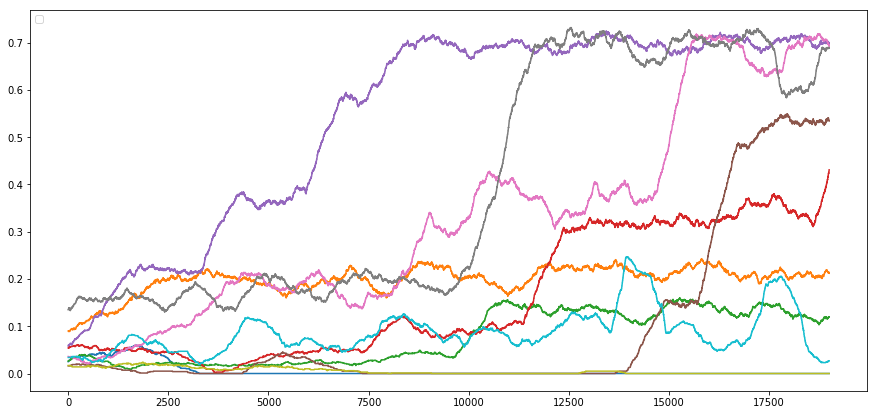

In [8]:
eligibility_traces = 0.1*np.arange(0,10)
plt.figure(figsize=(15, 7))
env_TD = gym.make('FrozenLake-v0') # creating a grid word environment
for eligibity_trace in eligibility_traces:
    agent_q_TD = TabularQAgent(env.observation_space, env.action_space, n_episodes=20000, 
                               init_std=1, discount=1, n_itr=1000, eligibility_trace = eligibity_trace, eps = 0.01)
    reached_goals_td = agent_q_TD.sarsa_lambda(env_TD)
    plt.plot(moving_average(reached_goals_td, 1000))
plt.legend(map(str, eligibility_traces), loc = 'upper left')

[2017-06-29 09:49:14,428] Making new env: FrozenLake-v0


The algorithm reached to goal 8356.0 times in 20000 number of episodes during learning phase.
The average reward in 100 episodes is 70.0
The algorithm reached to goal 12580.0 times in 20000 number of episodes during learning phase.
The average reward in 100 episodes is 76.0
The algorithm reached to goal 0.0 times in 20000 number of episodes during learning phase.
The average reward in 100 episodes is 0.0
The algorithm reached to goal 1.0 times in 20000 number of episodes during learning phase.
The average reward in 100 episodes is 0.0
The algorithm reached to goal 10444.0 times in 20000 number of episodes during learning phase.
The average reward in 100 episodes is 82.0
The algorithm reached to goal 2002.0 times in 20000 number of episodes during learning phase.
The average reward in 100 episodes is 14.0
The algorithm reached to goal 9512.0 times in 20000 number of episodes during learning phase.
The average reward in 100 episodes is 75.0
The algorithm reached to goal 7010.0 times in 2

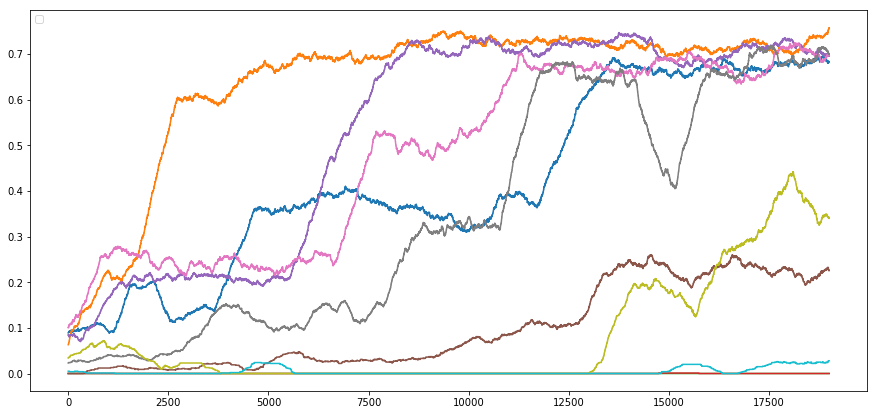

In [9]:
eligibility_traces = 0.1*np.arange(0,10)
plt.figure(figsize=(15, 7))
env_TD = gym.make('FrozenLake-v0') # creating a grid word environment
for eligibity_trace in eligibility_traces:
    agent_q_TD = TabularQAgent(env.observation_space, env.action_space, n_episodes=20000, 
                               init_std=1, discount=1, n_itr=1000, eligibility_trace = eligibity_trace, eps = 0.01)
    reached_goals_td = agent_q_TD.sarsa_lambda(env_TD)
    agent_q_TD.accuracy(env_TD, 100)
    plt.plot(moving_average(reached_goals_td, 1000))
plt.legend(map(str, eligibility_traces), loc = 'upper left')

In [10]:
q_agent = TabularQAgent(FLenv.observation_space, FLenv.action_space, init_std=0, discount=0.9, 
                        n_episodes=20000, eps=1, polynomial_learning_rate=0.0, eligibility_trace=0.9)
t = q_agent.learn(FLenv)
q_agent.accuracy(FLenv, 100)

The algorithm reached to goal 276.0 times in 20000 number of episodes during learning phase.
The average reward in 100 episodes is 100.0


In [11]:
q_agent.accuracy(FLenv, 1000)

The average reward in 1000 episodes is 1000.0


In [12]:
cum_reward = 0.0
max_iteration = 1000
q = q_agent.q
for n_episode in xrange(100):
    present_state = FLenv.reset()
    for n_itr in xrange(max_iteration):
        action = np.argmax(q[present_state])
        next_state, reward, done, _ = FLenv.step(action)
        present_state = next_state
        if done:
            cum_reward += reward
            break

NameError: name 'xrange' is not defined

In [ ]:
env.render()

# 8x8 Frozen Lake

In [ ]:
env = gym.make('FrozenLake8x8-v0') # creating a grid word environment
q_learning = TabularQAgent(env.observation_space, env.action_space, n_episodes=100000, 
                           init_std=1, discount=1, n_itr=10000)
q_learning.learn(env)
q_learning.accuracy(env, 100)
